# Machine Learning - SVM

* SVM aplicado na classificação de flores e na classificação de músicas do Spotify.
* O SVM será utilizado para criação de classificador que identifica possiveis músicas que um usuário poderia gostar.
* Iremos treinar o algoritmo, validar o modelo e fazer tunning dos parâmetros do SVM.

# Scripts e Base de dados

* A base de dados de **músicas do Spotify** bem como o **notebook com os scripts** dessa aula podem ser baixados em nosso GitHub [aqui](https://github.com/minerandodados/mdrepo/blob/master/petr4_1_2010_11_2017.csv).
* Base de dados Iris, para conhecer clique [aqui](https://archive.ics.uci.edu/ml/datasets/iris)

**Bibliotecas utilizadas**

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

**Importando dataset iris**

In [2]:
from sklearn import datasets

In [3]:
# Carregando o dataset para o array chamado Iris
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
type(iris)

sklearn.utils.Bunch

In [6]:
# Viasualizando a features do dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# Nome das Classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Separando dados de treino
treino = iris.data

In [9]:
# Separando dados de classes
classes = iris.target

In [10]:
# Visualizando a forma de array dos dados de treino
# Formato (Linhas,Colunas)
treino.shape

(150, 4)

In [11]:
# Visualizando os dados de treino
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [12]:
# Visualizando as classes em forma de array
classes.shape

(150,)

In [13]:
# Visualizando os dados únicos do array de classes
set(classes)

{0, 1, 2}

In [14]:
# Visualiazando os dados de classe
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualizando os dados

* **Visualizando a dispersão de dados quanto a classe**

<IPython.core.display.Javascript object>


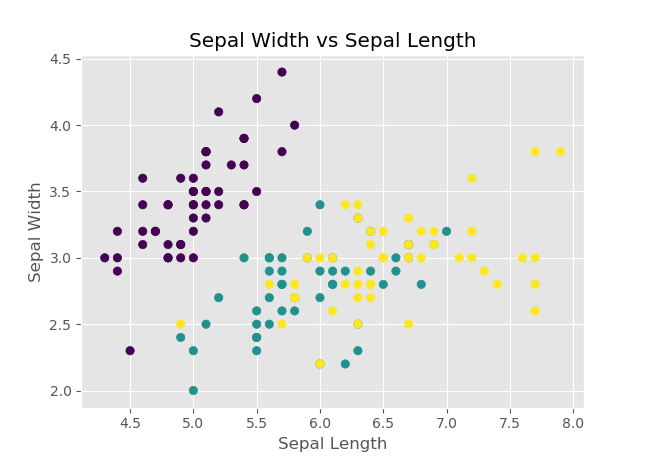

In [15]:
# Plota o gráfico de dispersão dos dados com a relação a classe.
# Dispersão dos dados de Sepal width e Sepal Length com as classes (0, 1, 2)
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
# Sepal Length vs Sepal Width
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs Sepal Length')
plt.scatter(treino[:,0],treino[:,1], c=classes)

<IPython.core.display.Javascript object>


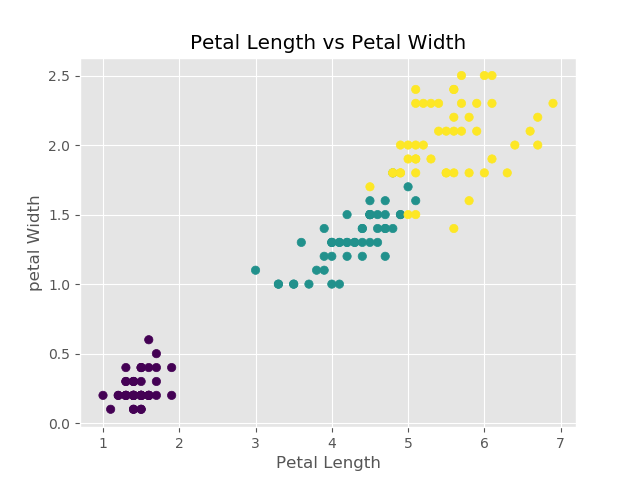

In [16]:
# Plota o gráfico de dispersão dos dados com a relação a classe.
# Dispersão dos dados de Petal width e Petal Length com as classes (0, 1, 2)
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Petal Length')
plt.ylabel('petal Width')
plt.title('Petal Length vs Petal Width')
plt.scatter(treino[:,2],treino[:,3], c=classes)

# Aplicando o SVM

* Vamos agora aplicar o SVM para classificar flores usando a base e dados Iris.

In [17]:
# Usaremos 80% dos dadaos para treino e 20% para teste.
# Visualizando o tamanho dos dados de treino.
len(treino[:30]), len(classes[:30])

(30, 30)

In [46]:
# Visualizando os dados de treino
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
# Visualizando as classes correspondentes
classes[:-30] # Conta de trás para frente e pega da esquerda p  direita ate está posição

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
# Treinando o algoritmo de SVM
clf = svm.SVC().fit(treino[:-30], classes[:-30])

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
# O Objeto clf
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
# Cria um array com os dados de teste
# 20% dos dados que não foram treinados
teste = treino[-30:]

In [50]:
# Visualizando os dados de teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [51]:
# Predizendo valores com a porção de teste
clf.predict(teste)

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
# Cria um Array com as classes dos dados de teste
classes_teste = classes[-30:]

In [53]:
# Visualizando as classes de Teste
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

# Visualizando os Resultados de Classificação

<IPython.core.display.Javascript object>


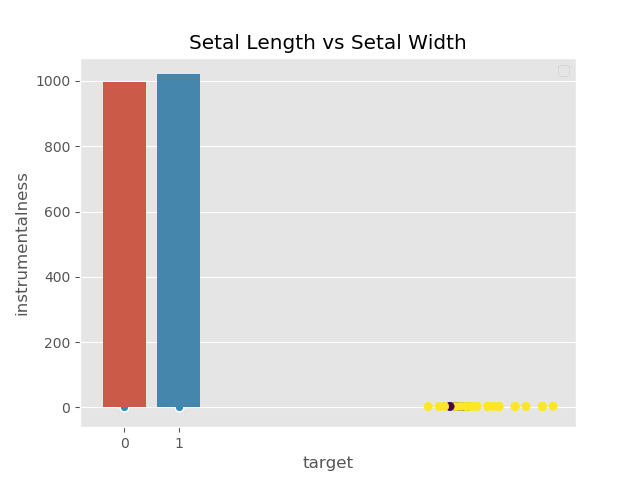

No handles with labels found to put in legend.


In [54]:
# Gráfico de dispersão entre as colunas Sepal Length, Sepal Width e a Classe.
# os pontos roxos são pontos no qual o classificador errou
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Setal Length')
plt.ylabel('Setal Width')
plt.title('Setal Length vs Setal Width')
plt.legend()
plt.scatter(treino[-30:, 0], treino[-30:, 1], c=clf.predict(teste))

<IPython.core.display.Javascript object>


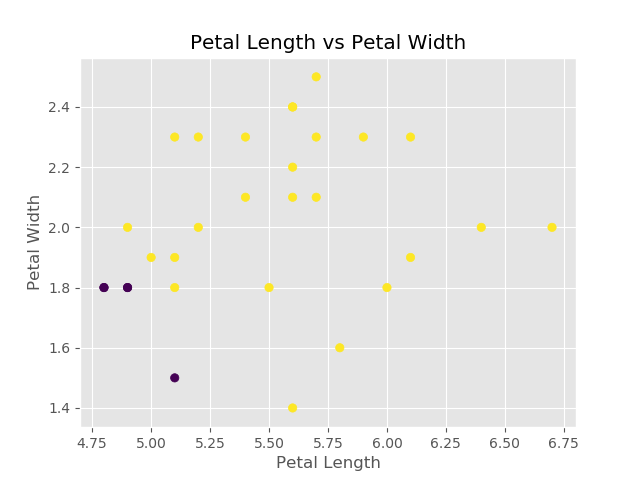

In [88]:
# Gráfico de dispersão entre as colunas Pepal Length, Pepal Width e a Classe.
# os pontos roxos são pontos no qual o classificador errou
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.scatter(treino[-30:, 2], treino[-30:, 3], c=clf.predict(teste))


<IPython.core.display.Javascript object>


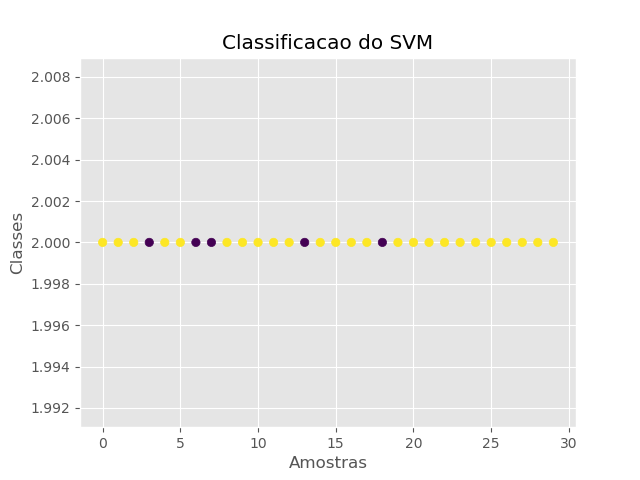

In [89]:
# Gráfico de instâncias e predição destas.
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificacao do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste))

# Matriz de Confusão

In [55]:
print (pd.crosstab(classes_teste, clf.predict(teste), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito  1   2  All
Real               
2        5  25   30
All      5  25   30 


# Cross Validation

In [64]:
# Função que retorna a acurácia após fazer uma validação cruzada (Cross Validation)
def Acuracia(clf, X, y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y, resultados)

In [65]:
Acuracia(clf, treino, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

0.98

# Métricas de Avaliação

In [68]:
# Imprime as métricas: 'Precisão', revocação, e Medida F1
resultados = cross_val_predict(clf, treino, classes, cv=10)
valor_classes = [0, 1, 2]
print(metrics.classification_report(classes, resultados, valor_classes)) # 3 Parâmetro é o valor das classes.

# F1-score é media da precision com o recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

# Base de dados de músicas do Spotify

In [87]:
# Informações das Features da Base de dados.
# https://developer.spotify.com/web-api/get-audio-features/

**Importação das bibliotecas**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Variáveis Dataset

* **id** - Identificação da linha.
* **acousticness** - Acústico
* **danceability** - Danceabilidade
* **duration_ms** - Duração em ms
* **energy** - Energia
* **instrumentalness** - Instrumentalidade
* **key** - Chave
* **liveness** - Vivacidade
* **loudness** - Sonoridade
* **mode** - Modo
* **speechiness** - Discurso
* **tempo** - Tempo
* **time_signature** - Assinaturas do tempo
* **valence** - Valencia
* **target** - Alvo
* **song_title** - Título da Música
* **artist** - Artista

In [132]:
df = pd.read_csv('./Materiais de Apoio/data.csv', sep=',')

In [133]:
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


**Colunas do Dataframe**

In [4]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [5]:
# Checando valores Missing
dataset.isnull().sum()

NameError: name 'dataset' is not defined

In [ ]:
# Resumo Estatístico da Base
# Somente dados numéricos
df.describe()

In [ ]:
# Lista estilos disponiveis do Matplotlib
plt.style.available

In [ ]:
%matplotlib notebook
style.use('seaborn-colorblind')
df.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

In [ ]:
%matplotlib notebook
style.use('seaborn')
df.plot(x='tempo', y='valence', kind='scatter', c='target', colormap='Accent')

In [ ]:
%matplotlib notebook
style.use('seaborn')
df.plot(x='tempo', y='speechiness', kind='scatter', c='target', colormap='Accent')

In [ ]:
%matplotlib notebook
style.use('seaborn')
df.plot(x='danceability', y='energy', kind='scatter', c='target', colormap='Accent')

# Separa a classe dos dados

In [134]:
classes = df['target']

In [135]:
df.drop('target', axis=1, inplace=True)

In [136]:
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys


## Pré-Processamento de Dados

In [137]:
def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)
    return 0

In [138]:
# Remove Features
remove_features(['id', 'song_title'])

0

In [68]:
# Visualizando o Dataset
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [45]:
# Visualizando o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Columns: 1356 entries, acousticness to artist_플랫핏 Flat Feet
dtypes: float64(10), int64(3), uint8(1343)
memory usage: 2.8 MB


# Label Encoder

* Técnica para codificar valores categoricos em numéricos;
* Um exemplo seria: a lista de cores: ('*branco*','*preto*','*amarelo*','*vermelho*','*branco*')
* Após aplicar o LabelEncoder esta seria algo assim: (**1**,**2**,**3**,**4**,**1**)

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
enc = LabelEncoder()

In [141]:
inteiros = enc.fit_transform(df['artist'])

In [142]:
# Visualizando valores únicos.
set(inteiros)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [143]:
# Cria uma nova coluna com os dados transformados em númericos 'artist_inteiros'
df['artist_inteiros'] = inteiros

In [144]:
# Visualizando o Dataframe alterado
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [145]:
# Removendo a feature 'artist'
remove_features(['artist'])

0

In [146]:
# Visualizando o Dataframe
df.head(20)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,356
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,356
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,869
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,321
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,516


# One Hot Encoding

* Técnica usada para codificar valores categóricos em númericos.
* Cria uma Matriz de presença.
* Resolve o problema **Ordenação** nos dados gerados pelo LabelEncoder.

In [14]:
# Importa o One Hot Enconding
from sklearn.preprocessing import OneHotEncoder

In [15]:
# Instância do objeto OneHotEncoder
ohe = OneHotEncoder()

In [16]:
# Transforma em arrayn numpy o dataset
df_array = df.values

In [17]:
# Pega o número de linhas
num_rows = df_array.shape[0]

In [18]:
# Visualiza coluna de inteiros
df_array[:][:,13]

array([0.28600000000000003, 0.588, 0.17300000000000001, ..., 0.47, 0.623,
       0.402], dtype=object)

In [19]:
# Transforma a matriz em uma dimensão
inteiros = inteiros.reshape(len(inteiros), 1)

In [20]:
# Criar as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
# Imprime as novas features
novas_features

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [22]:
# Concatenar as novas features no array
df_array = np.concatenate([df_array, novas_features.toarray()], axis=1)

In [23]:
# Visualizando a quantidade de linhas e colunas da base
df_array.shape

(2017, 1361)

In [24]:
# Transforma em Dataframe
dataf = pd.DataFrame(df_array)

In [25]:
dataf.head()

,0,1,2,3,4,5,6,7,8,9,...,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360
0,0,0.0102,0.833,204600,0.434,0.0219,2,0.165,-8.795,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.199,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,...,0,0,0,0,0,0,0,0,0,0
3,3,0.604,0.494,199413,0.338,0.51,5,0.0922,-15.236,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0.18,0.678,392893,0.561,0.512,5,0.439,-11.648,0,...,0,0,0,0,0,0,0,0,0,0


# Pandas Get_dummies

* Cria uma matriz de presença com o OHE

In [106]:
df = pd.read_csv('./Materiais de Apoio/data.csv', sep=',')

In [108]:
# Aplicando o get dummies nos dados
df = pd.get_dummies(df, columns=['artist'], prefix=['artist'])

KeyError: "None of [Index(['artist'], dtype='object')] are in the [columns]"

In [109]:
# Remove Features
remove_features(['id', 'song_title'])

0

In [110]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,...,0,0,0,0,0,0,0,0,0,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,...,0,0,0,0,0,0,0,0,0,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,...,0,0,0,0,0,0,0,0,0,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Visualizando as features
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1357)

In [112]:
len(df.columns)

1357

In [113]:
# Checando tipos do Dataframe
df.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1357, dtype: object

In [114]:
# Checando
df.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1357, dtype: int64

In [115]:
# Coluna artist
df.values[:][:,13]

array([1., 1., 1., ..., 0., 0., 0.])

# Pipeline

In [116]:
# Função que retorna a acurácia após fazer uma validação cruzada (Cross Validation)
def Acuracia(clf, X, y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y, resultados)

In [117]:
# Importe as bibliotecas de Pipelines e Pré-Processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [118]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0


In [119]:
classes

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [120]:
# Treinando o algoritmo de SVM
# pip_1, dataset_array, classes

clf = svm.SVC().fit(df, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [130]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Com a Matriz de Classes

In [122]:
Acuracia(clf, df, classes) # CrossValidation

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

0.5448686167575607

In [123]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC())
])

In [124]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o Pipeline 1
Acuracia(pip_1, df, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

0.9672781358453149

In [125]:
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [126]:
# Chama a função acuracia passando os dados de musicas e de classes
# usando o Pipeline pip_2 
Acuracia(pip_2, df, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

1.0

In [127]:
Acuracia(pip_3, df, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

0.9672781358453149

In [128]:
Acuracia(pip_4, df, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

0.5751115518096183

In [129]:
Acuracia(pip_5, df, classes)

1.0

# Teste Apenas com Label Encoder

In [147]:
# Treinando o algoritmo de SVM
# pip_1, dataset_array, classes

clf = svm.SVC().fit(df, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [148]:
# Por padrão é selecionado o kernel RBF
Acuracia(pip_1, df, classes)

0.7149231531978185

In [149]:
Acuracia(pip_2, df, classes)

D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Desenvolvimento\Anaconda\lib\site-packages\sklearn\svm\base.py:193:

0.6122954883490332

# Testando o Desempenho dos Kernels

In [150]:
# Utilizando o kernel RBF
Acuracia(pip_3, df, classes)

0.7149231531978185

In [151]:
# Utilizando o kernel poly
Acuracia(pip_4, df, classes)

0.6683192860684184

In [152]:
# # Utilizando o kernel Linear
Acuracia(pip_5, df, classes)

0.6236985622211205

# Tunning

In [154]:
# Importa o utilitário GridSearch
from sklearn.model_selection import GridSearchCV

In [173]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

lista_kernel = ['rbf', 'linear', 'poly']

# Lista de Valores Gama
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [183]:
# Define um dicionário que recece as lista de parâmetros e valores
parametros_grid = dict(clf__C = lista_c, clf__gamma=lista_gamma, clf__kernel=lista_kernel)
parametros_grid

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__kernel': ['rbf', 'linear', 'poly']}

In [184]:
# O Objeto Grid recebe os parametros de Pipeline, e as configurações de Cross Validation
# Accuracy após o Cross validation de 10 partes.
grid = GridSearchCV(pip_1, parametros_grid, cv=10, scoring='accuracy') 

In [ ]:
# Aplica o gridsearch passando os dados de treino e classe
grid.fit(df, classes)

# Resultados de Grid

In [ ]:
# Imprime os scores por combinações
grid.cv_results_

In [168]:
# Imprime os melhores Parâmetross
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.01}

In [166]:
# Imprime os melhores scores
grid.best_score_

0.7208725830441249